# Calculate SWE using SNVs at grid cell scale

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import xarray as xr
import pickle
# import rasterio as rio
# from rasterio.merge import merge

In [2]:
swe = xr.open_dataset('../data/reanalysis/swe_reanalysis_ucrb.nc')
stations = pickle.load(open('../data/snv_dataframes/snv_temp_precip_cluster_gdf.pkl','rb'))

In [4]:
swe

<xarray.Dataset> Size: 343MB
Dimensions:      (y: 1776, x: 1508, Year: 32)
Coordinates:
  * y            (y) float64 14kB 35.56 35.57 35.57 35.58 ... 43.44 43.45 43.45
  * x            (x) float64 12kB -112.3 -112.3 -112.3 ... -105.6 -105.6 -105.6
  * Year         (Year) int64 256B 1990 1991 1992 1993 ... 2018 2019 2020 2021
    spatial_ref  int64 8B ...
Data variables:
    SWE_Post     (Year, y, x) float32 343MB ...

In [12]:
swe.x

<xarray.DataArray 'x' (x: 1508)> Size: 12kB
array([-112.326141, -112.321693, -112.317245, ..., -105.637497, -105.633049,
       -105.628601])
Coordinates:
  * x            (x) float64 12kB -112.3 -112.3 -112.3 ... -105.6 -105.6 -105.6
    spatial_ref  int64 8B ...
Attributes:
    Units:          degrees_east
    axis:           X
    long_name:      longitude
    standard_name:  longitude
    units:          degrees_east

In [13]:
swe.SWE_Post.isel(x=700,y=700)[31]

<xarray.DataArray 'SWE_Post' ()> Size: 4B
array(0., dtype=float32)
Coordinates:
    y            float64 8B 38.67
    x            float64 8B -109.2
    Year         int64 8B 2021
    spatial_ref  int64 8B ...
Attributes:
    Units:    meters

In [15]:
swe.SWE_Post.where(swe.SWE_Post.mean(dim='Year')>0.1).isel(x=0,y=0)

<xarray.DataArray 'SWE_Post' (Year: 32)> Size: 128B
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan], dtype=float32)
Coordinates:
    y            float64 8B 35.56
    x            float64 8B -112.3
  * Year         (Year) int64 256B 1990 1991 1992 1993 ... 2018 2019 2020 2021
    spatial_ref  int64 8B 0
Attributes:
    Units:    meters

In [8]:
swe.SWE_Post.isel(x=0,y=0).mean(dim='Year')

<xarray.DataArray 'SWE_Post' ()> Size: 4B
array(nan, dtype=float32)
Coordinates:
    y            float64 8B 35.56
    x            float64 8B -112.3
    spatial_ref  int64 8B ...

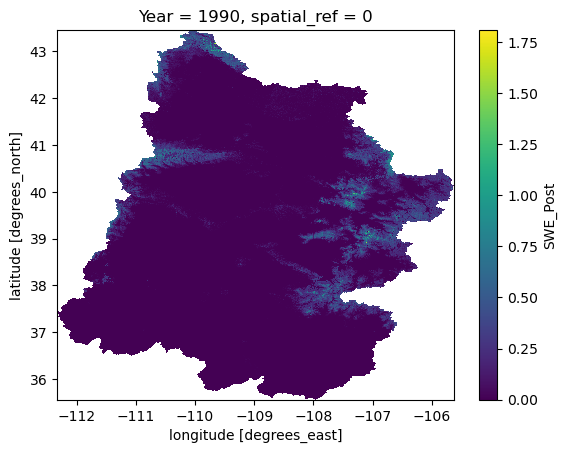

In [11]:
swe.SWE_Post[0].plot()

In [24]:
# Find the indices of non-NaN values
#non_nan_indices = np.where(~np.isnan(swe.SWE_Post))[0]

In [3]:
huc2 = gpd.read_file('../data/huc2.geojson')

In [4]:
huc2['huc2'] = huc2['huc2'].astype('int')

In [85]:
huc2

,huc2,areaacres,areasqkm,states,huc10,name,geometry
0,9,7.368587e+05,2981.97,"MTMTCN,MTCN,MTCN,MTCN,MTCN,MTMTCN,MT",0904000101090400010209040002010904000103090400...,Headwaters Saint Mary RiverSwiftcurrent CreekH...,"POLYGON ((-113.46394 48.61630, -113.46407 48.6..."
1,10,1.521878e+08,615882.85,MTCOCOCOCOCOCOMTMTMTCOMTMTMTMTMTMTMTMTMTMTMTMT...,1004020102101900030910190003101019000311101900...,South Fork Musselshell RiverLost CreekSanborn ...,"POLYGON ((-111.87005 44.56395, -111.87022 44.5..."
2,11,3.276798e+07,132607.43,"NM,TXNM,TXNM,TXCO,NMCO,NMNM,OKNM,TXCO,NM,OKCO,...",1112010103110901010311120101021104000103110800...,Frio DrawArroyo TrujilloOutlet Tierra Blanca C...,"POLYGON ((-104.67753 35.22997, -104.67807 35.2..."
3,12,5.459801e+06,22095.06,"NM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXNM,TXN...",1205000202120500050112080001021208000307120800...,Headwaters Blackwater DrawRunning Water DrawSu...,"POLYGON ((-103.06480 32.69076, -103.06486 32.6..."
4,13,5.691493e+07,230326.85,"MX,NMNM,TXNM,TXNM,TXNM,TXNM,TXMX,NMMX,NMMX,NMM...",1303020109130500040913050004171307000101130700...,Simpson DrawNorth DrawLinda LakeRed Bluff Rese...,"POLYGON ((-108.75655 31.33269, -108.75660 31.3..."
5,14,7.254242e+07,293569.06,"COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...",1401000107140100011014010003021404010108140801...,Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...,"POLYGON ((-110.93089 36.58755, -110.93103 36.5..."
6,15,9.350180e+07,378388.72,"AZAZ,MXAZ,MXAZAZAZAZAZAZAZAZAZAZAZAZAZAZAZNVNV...",1505030203150801030615050301051506010503150601...,Tanque Verde Creek-Rillito RiverTule DesertJos...,"POLYGON ((-114.80074 32.49040, -114.81362 32.4..."
7,16,9.069970e+07,367048.98,"NVNVNVNVNVNVNVNVNVNVCA,NVNVNVNV,UTNV,UTNV,UTNV...",1604010705160401070116040107021604010704160401...,Antelope CreekHeadwaters Reese RiverCottonwood...,"POLYGON ((-119.08154 38.21990, -119.08087 38.2..."
8,17,1.822409e+08,737503.26,"ORORIDWAORORORORORORORORID,ORIDIDIDIDWAWAWAIDI...",1705010807170703060217040214041706010904170701...,Lower Cow CreekWillow CreekLower Beaver CreekL...,"MULTIPOLYGON (((-124.42555 42.35187, -124.4240..."
9,18,1.072632e+08,434079.25,"CACACA,MXCA,MXCACACACACACACACACACACACACACACACA...",1806000901180902080518070305051807030513180400...,San Antonio CreekUpper Fremont WashArroyo Seco...,"MULTIPOLYGON (((-123.01153 38.00344, -122.9924..."


In [5]:
ucrb = huc2[huc2['huc2']==14]

In [87]:
ucrb

,huc2,areaacres,areasqkm,states,huc10,name,geometry
5,14,72542420.79,293569.06,"COCOCOWYAZ,NMAZ,NMCO,NMCO,NMCO,NMCO,NMCO,NMCO,...",1401000107140100011014010003021404010108140801...,Muddy CreekRock CreekUpper Eagle RiverMuddy Cr...,"POLYGON ((-110.93089 36.58755, -110.93103 36.5..."


In [6]:
ucrb = ucrb.to_crs('epsg:4326')

In [7]:
clusters_reanalysis = xr.open_dataset('../data/swe_reanalysis_5clusters.nc')

In [8]:
clusters_reanalysis = clusters_reanalysis.__xarray_dataarray_variable__

In [9]:
clusters_reanalysis  = clusters_reanalysis.rio.write_crs('epsg:4326')

In [10]:
clusters_reanalysis.rio.crs

CRS.from_epsg(4326)

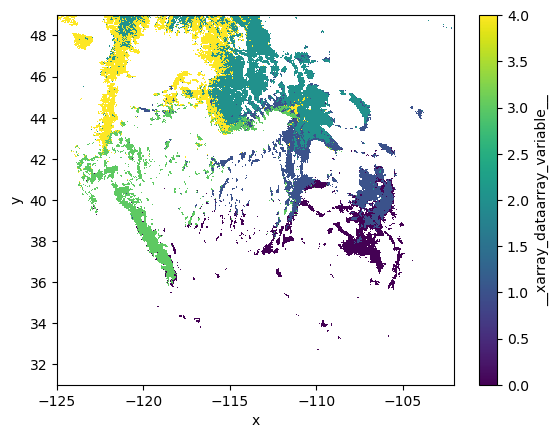

In [71]:
clusters_reanalysis.plot()

In [10]:
clusters_ucrb = clusters_reanalysis.rio.clip(ucrb.geometry)

In [12]:
clusters_ucrb

<xarray.DataArray '__xarray_dataarray_variable__' (y: 221, x: 188)> Size: 332kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * y            (y) float64 2kB 35.6 35.64 35.68 35.71 ... 43.36 43.39 43.43
  * x            (x) float64 2kB -112.3 -112.3 -112.2 ... -105.7 -105.7 -105.6
    spatial_ref  int64 8B 0

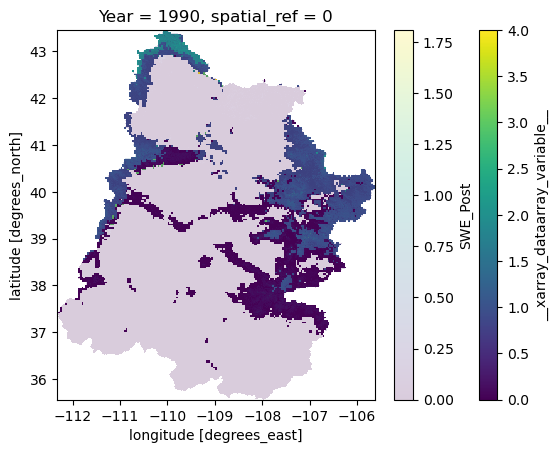

In [120]:
fig, ax = plt.subplots()
clusters_ucrb.plot(ax=ax)
swe.SWE_Post[0].plot(ax=ax, alpha=0.2)

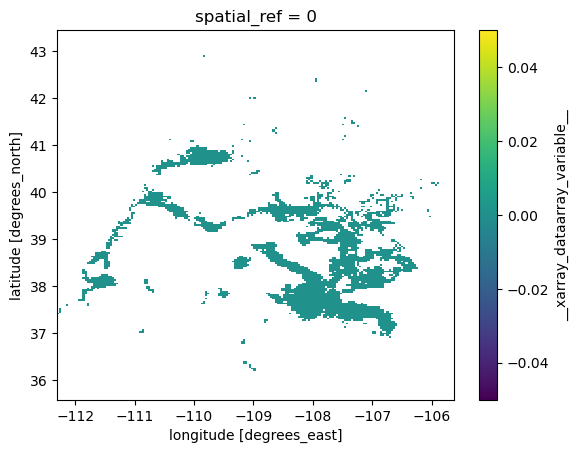

In [111]:
clusters_ucrb.where(clusters_ucrb==0).plot()

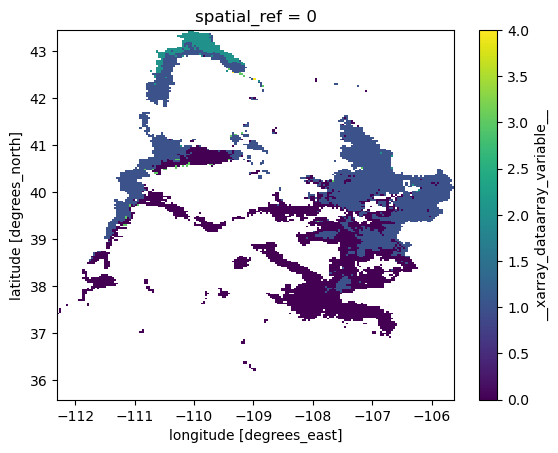

In [99]:
clusters_ucrb.plot()

In [68]:
swe.SWE_Post[0]

<xarray.DataArray 'SWE_Post' (y: 1776, x: 1508)> Size: 11MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
  * y            (y) float64 14kB 35.56 35.57 35.57 35.58 ... 43.44 43.45 43.45
  * x            (x) float64 12kB -112.3 -112.3 -112.3 ... -105.6 -105.6 -105.6
    Year         int64 8B 1990
    spatial_ref  int64 8B ...
Attributes:
    Units:    meters

### Calculate SWE by grid cell with cluster snv mean:

In [11]:
clusters_reanalysis_match = clusters_ucrb.rio.reproject_match(swe)

In [12]:
stations_ucrb = stations.clip(ucrb)

<Axes: >

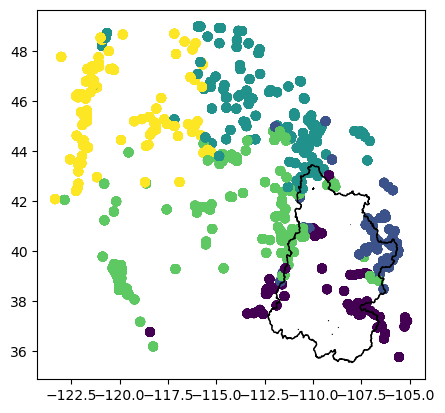

In [35]:
fig, ax = plt.subplots()
stations.plot(ax=ax, column='cluster')
ucrb.plot(ax=ax, facecolor='none', edgecolor='k')

<Axes: >

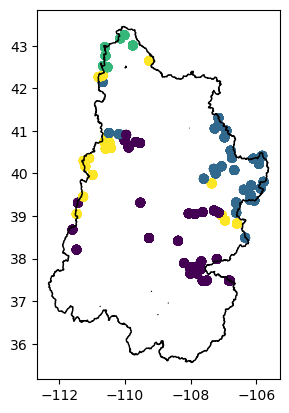

In [36]:
fig, ax = plt.subplots()
stations_ucrb.plot(ax=ax, column='cluster')
ucrb.plot(ax=ax, facecolor='none', edgecolor='k')

### Make empty data arrays for the SNVs and Calculate SWE:

In [20]:
mean_snv = xr.full_like(swe.SWE_Post, np.nan)
calculated_swe = xr.full_like(swe.SWE_Post, np.nan)

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

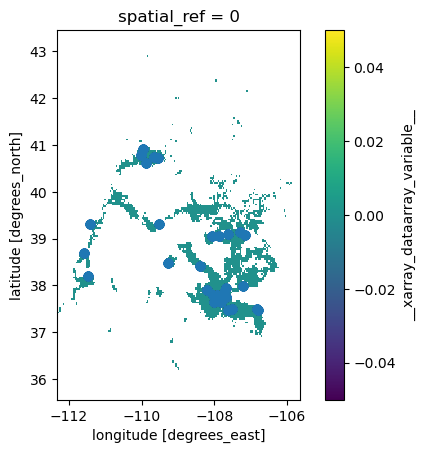

In [56]:
fig, ax = plt.subplots()
clusters_reanalysis_match.where(clusters_reanalysis_match == 0).plot(ax=ax)
stations_ucrb[stations_ucrb['cluster']==0].plot(ax=ax)

### Make data array of mean snvs for each cluster and year:

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='longitude [degrees_east]', ylabel='latitude [degrees_north]'>

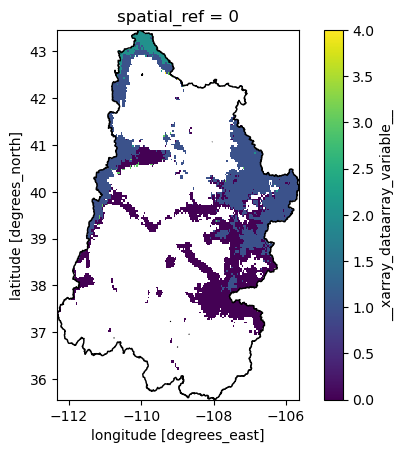

In [51]:
fig, ax = plt.subplots()
clusters_reanalysis_match.plot(cmap='viridis')
#clusters_ucrb.plot(ax=ax, cmap='Blues')
ucrb.plot(ax=ax, facecolor='none', edgecolor='k')

In [21]:
for year in np.arange(0,32):
    for cluster in np.arange(0,4):
        mean_snv[year] = mean_snv[year].where(clusters_reanalysis_match != cluster, lambda x: stations_ucrb[(stations_ucrb.index.get_level_values(1) == (year+1990)) & (stations_ucrb['cluster']==cluster)]['station_n'].mean())

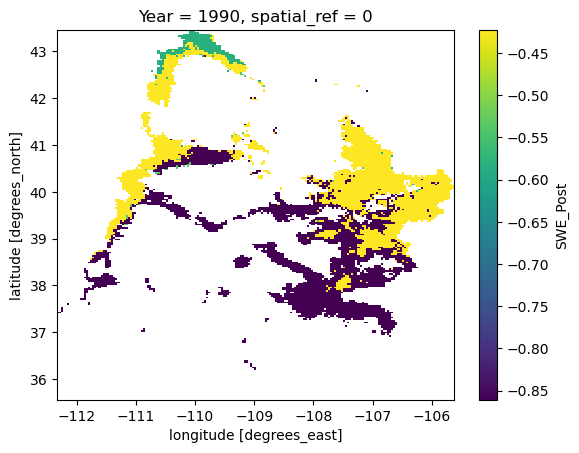

In [144]:
mean_snv[0].plot()

### Calculate SWE, excluding the 'current' year:

In [22]:
for year in np.arange(0,32):
    to_exclude = [year]
    years = [element for i, element in enumerate(np.arange(1990,2022)) if i not in to_exclude]
    calculated_swe[year] = mean_snv[year] * swe.SWE_Post.sel(Year=years).std(dim='Year', skipna=True, ddof=1).where(swe.SWE_Post.mean(dim='Year')>0.1) + swe.SWE_Post.sel(Year=years).mean(dim='Year').where(swe.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees

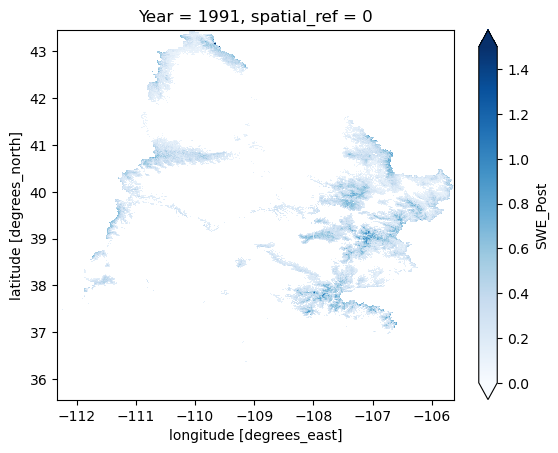

In [16]:
calculated_swe[1].plot(cmap='Blues',vmin=0,vmax=1.5)

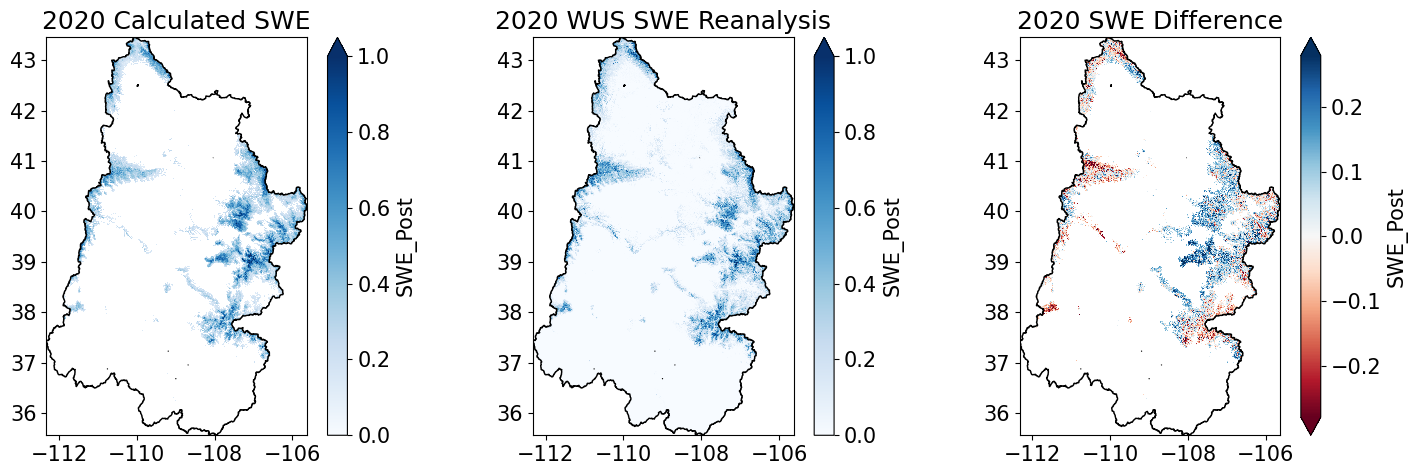

In [593]:
plt.rcParams.update({'font.size': 15})

fig, ax = plt.subplots(1,3, figsize=(15,5))

calculated_swe[30].plot(cmap='Blues', ax=ax[0], vmin=0,vmax=1)
ucrb.plot(ax=ax[0], facecolor='none', edgecolor='k')
swe.SWE_Post[30].plot(cmap='Blues', ax=ax[1], vmin=0,vmax=1)
ucrb.plot(ax=ax[1], facecolor='none', edgecolor='k')
dif_swe[30].plot(cmap='RdBu', ax=ax[2], robust=True)
ucrb.plot(ax=ax[2], facecolor='none', edgecolor='k')

ax[0].set_title('2020 Calculated SWE')
ax[1].set_title('2020 WUS SWE Reanalysis')
ax[2].set_title('2020 SWE Difference')

ax[0].set_xlabel('')
ax[0].set_ylabel('')

ax[1].set_xlabel('')
ax[1].set_ylabel('')

ax[2].set_xlabel('')
ax[2].set_ylabel('')

plt.tight_layout()
plt.savefig('../figures/calculated_swe_mean_snv_2020.jpeg',dpi=300)

### Compare to Reanalysis from the 'current' year:

In [23]:
dif_swe = calculated_swe - swe.SWE_Post

In [24]:
Rs = []
MDs = []
RMSEs = []

for year in np.arange(0,32):
    Rs.append(np.corrcoef(swe.SWE_Post[year].values[swe.SWE_Post[year].notnull() & calculated_swe[year].notnull()].flatten(), calculated_swe[year].values[swe.SWE_Post[year].notnull() & calculated_swe[year].notnull()].flatten())[0,1])
    MDs.append(dif_swe[year].values[dif_swe[year].notnull()].mean())
    RMSEs.append(np.sqrt(((calculated_swe[year].values[calculated_swe[year].notnull()] - swe.SWE_Post[year].values[calculated_swe[year].notnull()].flatten()) ** 2).mean()))

In [25]:
r = np.corrcoef(swe.SWE_Post.values[swe.SWE_Post.notnull() & calculated_swe.notnull()].flatten(), calculated_swe.values[swe.SWE_Post.notnull() & calculated_swe.notnull()].flatten())[0,1]
md = dif_swe.values[dif_swe.notnull()].mean()
rmse = np.sqrt(((calculated_swe.values[calculated_swe.notnull()] - swe.SWE_Post.values[calculated_swe.notnull()].flatten()) ** 2).mean())

In [20]:
print(r)
Rs

0.798136713283125


[0.7867145989795483,
 0.7549838550928634,
 0.6511541779193608,
 0.7968699037613457,
 0.7803052633363416,
 0.7680623534594491,
 0.8093511708939412,
 0.8474189115585249,
 0.7714957520414327,
 0.8125463680254047,
 0.7843332135671437,
 0.7617744948157789,
 0.7780024292890865,
 0.8013892749870005,
 0.8721774008343746,
 0.7551983375476351,
 0.8702779986471558,
 0.8252583873414864,
 0.8384010164323409,
 0.8153464254299109,
 0.5894688275725114,
 0.8472684727428379,
 0.7251391224609243,
 0.8056684346376377,
 0.7324073761117059,
 0.8213070284314301,
 0.7704634556950019,
 0.7973632751340415,
 0.8158395093274632,
 0.7811255888630463,
 0.797618629909432,
 0.6701704147492235]

In [21]:
print(md)
MDs

-0.00043269902


[-0.025591247,
 0.017817507,
 -0.06939142,
 -0.0053696437,
 0.02858751,
 0.034160655,
 0.038124118,
 0.08560423,
 -0.069802076,
 -0.002519265,
 -0.0098099625,
 -0.0016830899,
 -0.06459334,
 0.033608604,
 -0.045125283,
 -0.039240777,
 0.01754741,
 0.0070872637,
 0.053512108,
 0.080314346,
 -0.062466465,
 0.09783507,
 -0.08523618,
 -0.024278497,
 0.026739664,
 -0.040884912,
 0.0064369664,
 -0.023530832,
 0.0030967332,
 -0.009426391,
 0.03216826,
 0.0024625883]

In [22]:
print(rmse)
RMSEs

0.13511856


[0.112247035,
 0.116194904,
 0.19895461,
 0.1290711,
 0.1066725,
 0.14879672,
 0.17169313,
 0.15090707,
 0.1600289,
 0.10926807,
 0.117903806,
 0.107353136,
 0.12853925,
 0.12773119,
 0.116974995,
 0.158524,
 0.11094045,
 0.09950838,
 0.12337383,
 0.13924499,
 0.15392445,
 0.15293203,
 0.15669025,
 0.0910648,
 0.16807373,
 0.10006513,
 0.1279056,
 0.17048697,
 0.10152718,
 0.13759117,
 0.12592588,
 0.12631859]

### Calculate SWE using nearest within-cluster SNOTEL:

### Make a data array containing the SNV of the nearest within-cluster snotel:

In [26]:
nearest_station = xr.full_like(clusters_reanalysis_match.rio.reproject('epsg:32612'), np.nan)

In [24]:
nearest_station

<xarray.DataArray '__xarray_dataarray_variable__' (y: 1978, x: 1350)> Size: 21MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 11kB 3.798e+05 3.803e+05 ... 9.865e+05 9.869e+05
  * y            (y) float64 16kB 4.825e+06 4.825e+06 ... 3.936e+06 3.935e+06
    spatial_ref  int64 8B 0

### Make a dataframe with only one geometry per station:

In [27]:
stations_1yr = stations_ucrb[stations_ucrb.index.get_level_values(1) == 1990]
stations_1yr = stations_1yr.reset_index(level=1, drop=True)

In [26]:
stations_1yr.columns

Index(['station_n', 'reanalysis_n', 'elevation_m', 'station_swe',
       'station_swe_mean', 'reanalysis_swe', 'deg_days_0C', 'cold_deg_days',
       'cumulative_precip_m', 'precip_mean', 'precip_std', 'precip_n',
       'log_cumulative_precip_m', 'log_reanalysis_swe', 'log_station_swe',
       'log_precip_mean', 'log_station_swe_mean', 'log_reanalysis_swe_mean',
       'log_precip_std', 'log_station_swe_std', 'log_reanalysis_swe_std',
       'log_precip_n', 'log_station_n', 'log_reanalysis_n', 'latitude',
       'longitude', 'geometry', 'cluster'],
      dtype='object')

### And add an id column for numerical indexing:

In [28]:
stations_1yr['id'] = np.nan

In [29]:
for i in range(len(stations_1yr)):
    stations_1yr.loc[stations_1yr.index[i], 'id'] = i

### Convert to UTM to compute distances:

In [30]:
stations_1yr = stations_1yr.to_crs('epsg:32612')

In [31]:
nearest_station_utm = nearest_station.rio.reproject('epsg:32612')

In [32]:
clusters_reanalysis_match_utm = clusters_reanalysis_match.rio.reproject('epsg:32612')

### We'll use scipy.spatial cKDTree for efficient distance metrics:

In [33]:
from scipy.spatial import cKDTree

In [34]:
for cluster in np.arange(0,4):
    
    tree = cKDTree(np.c_[stations_1yr[stations_1yr['cluster']==cluster].geometry.x.values,stations_1yr[stations_1yr['cluster']==cluster].geometry.y.values])
    indices = np.where(clusters_reanalysis_match_utm == cluster)

    # Extract coordinates from indices in data1
    query_points = []
    for i in range(len(indices[0])):
        y_index = indices[0][i]
        x_index = indices[1][i]
        x_coord = nearest_station.coords['x'].values[x_index]
        y_coord = nearest_station.coords['y'].values[y_index]
        query_points.append((x_coord, y_coord))
    dist, idx = tree.query(query_points, k=1)
    for i in np.arange(len(query_points)):
        nearest_station.loc[dict(x=query_points[i][0], y=query_points[i][1])] = stations_1yr[stations_1yr['cluster']==cluster].iloc[idx[i]]['id']

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

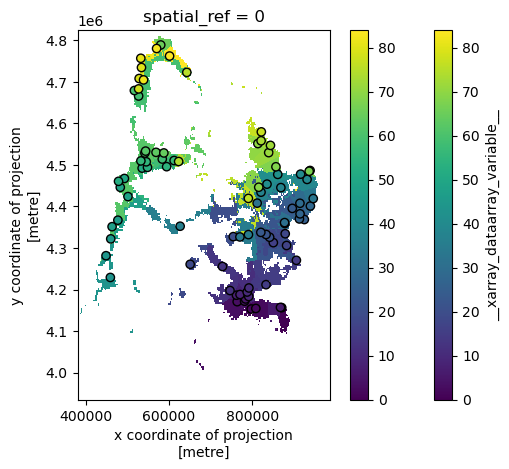

In [272]:
fig, ax = plt.subplots()
nearest_station.plot(ax=ax)
stations_1yr.plot(ax=ax,column='id', edgecolor='k',legend=True)

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

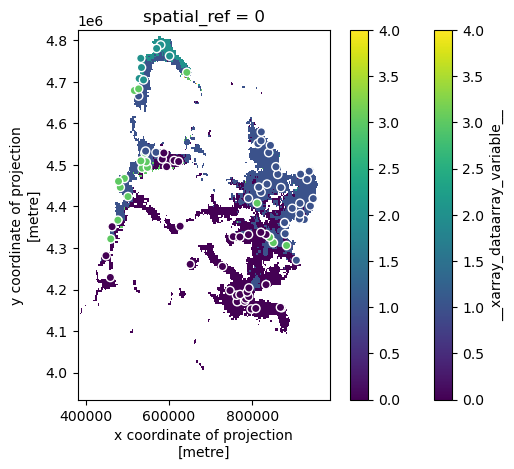

In [258]:
fig, ax = plt.subplots()
clusters_reanalysis_match_utm.plot(ax=ax)
stations_1yr.plot(ax=ax,column='cluster', edgecolor='white',legend=True, vmin=0,vmax=4)

## Use the look-up data array of nearest SNOTEL ids to make a data array with SNVs for each year from that SNOTEL:

### First, create an empty data array to populate:

In [35]:
nearest_snv = xr.full_like(swe.SWE_Post, np.nan)

In [36]:
nearest_station_4326 = nearest_station.rio.reproject('epsg:4326')

In [37]:
nearest_station_4326 = nearest_station.rio.reproject_match(nearest_snv)

In [38]:
site_ids = list(np.unique(nearest_station_4326.data))
site_ids_nan = site_ids[0:-1]

for i in site_ids_nan:
    for year in range(0,32):
        nearest_snv[year] = nearest_snv[year].where((nearest_station_4326 != i), stations[(stations.index.get_level_values(1)==(year + 1990)) & (stations.index.get_level_values(0) == stations_1yr[stations_1yr['id']==i].index[0])]['station_n'].values[0])

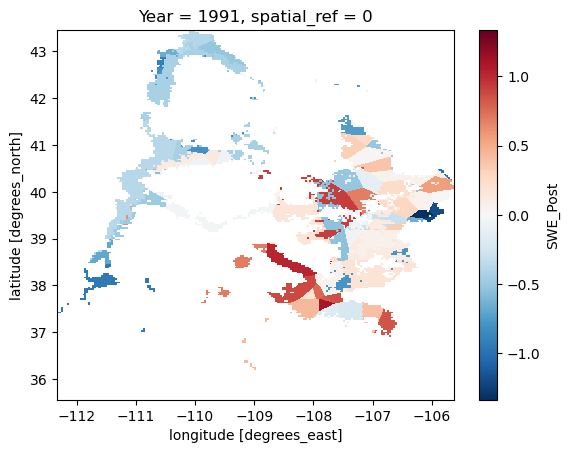

In [493]:
nearest_snv[1].plot()

In [39]:
swe_calc_nearest = xr.full_like(swe.SWE_Post, np.nan)

In [40]:
for year in np.arange(0,32):
    to_exclude = [year]
    years = [element for i, element in enumerate(np.arange(1990,2022)) if i not in to_exclude]
    swe_calc_nearest[year] = nearest_snv[year] * swe.SWE_Post.sel(Year=years).std(dim='Year', skipna=True, ddof=1).where(swe.SWE_Post.mean(dim='Year')>0.1) + swe.SWE_Post.sel(Year=years).mean(dim='Year').where(swe.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees

### Compare to Reanalysis from the 'current' year:

In [41]:
dif_swe2 = swe_calc_nearest - swe.SWE_Post

In [42]:
R2s = []
MD2s = []
RMSE2s = []

for year in np.arange(0,32):
    R2s.append(np.corrcoef(swe.SWE_Post[year].values[swe.SWE_Post[year].notnull() & swe_calc_nearest[year].notnull()].flatten(), swe_calc_nearest[year].values[swe.SWE_Post[year].notnull() & swe_calc_nearest[year].notnull()].flatten())[0,1])
    MD2s.append(dif_swe2[year].values[dif_swe2[year].notnull()].mean())
    RMSE2s.append(np.sqrt(((swe_calc_nearest[year].values[swe_calc_nearest[year].notnull()] - swe.SWE_Post[year].values[swe_calc_nearest[year].notnull()].flatten()) ** 2).mean()))

In [43]:
r2 = np.corrcoef(swe.SWE_Post.values[swe.SWE_Post.notnull() & swe_calc_nearest.notnull()].flatten(), swe_calc_nearest.values[swe.SWE_Post.notnull() & swe_calc_nearest.notnull()].flatten())[0,1]
md2 = dif_swe2.values[dif_swe2.notnull()].mean()
rmse2 = np.sqrt(((swe_calc_nearest.values[swe_calc_nearest.notnull()] - swe.SWE_Post.values[swe_calc_nearest.notnull()].flatten()) ** 2).mean())

In [499]:
print(r2)
R2s

0.7748093458186383


[0.7179012900723387,
 0.7066229783254251,
 0.5911660537607684,
 0.7552721427735177,
 0.7737671876994188,
 0.7880988161831425,
 0.8098154650312444,
 0.776658450839922,
 0.7358192930474224,
 0.7539882272005491,
 0.7497198783952629,
 0.720891565334264,
 0.7330641136838935,
 0.7767324708362217,
 0.7983075192811031,
 0.7554537469444853,
 0.8574946610325933,
 0.7767664115518853,
 0.7769572898330169,
 0.7629810259839073,
 0.6038414076386613,
 0.804791390253112,
 0.6875711420304295,
 0.7610116302361676,
 0.7206048958811226,
 0.7710660552241977,
 0.715691551838401,
 0.7566682517954878,
 0.7948160732003909,
 0.7420656861631201,
 0.7799855829638173,
 0.6267895967918427]

In [44]:
R_dif = np.subtract(Rs, R2s)

Text(0, 0.5, 'Mean - Nearest (Difference in Rs')

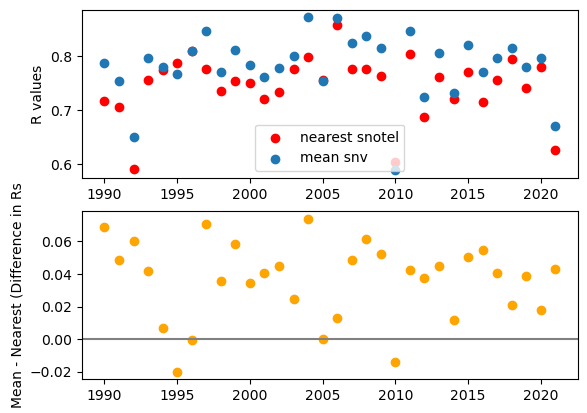

In [542]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), R2s, color='red', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), Rs, label='mean snv')
ax1.legend(loc='lower center')
ax1.set_ylabel('R values')

ax2.scatter(np.arange(1990, 2022), np.subtract(Rs, R2s), color = 'orange', label='mean snv')
ax2.axhline(0, color='grey')
ax2.set_ylabel('Mean - Nearest (Difference in Rs')

Text(0, 0.5, 'Mean - Nearest (Difference in MDs')

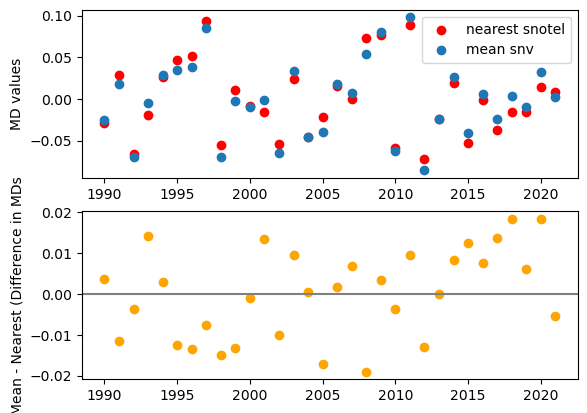

In [544]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), MD2s, color='red', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), MDs, label='mean snv')
ax1.legend(loc='best')
ax1.set_ylabel('MD values')

ax2.scatter(np.arange(1990, 2022), np.subtract(MDs, MD2s), color = 'orange', label='mean snv')
ax2.axhline(0, color='grey')
ax2.set_ylabel('Mean - Nearest (Difference in MDs')

Text(0, 0.5, 'Mean - Nearest (Difference in RMSEs')

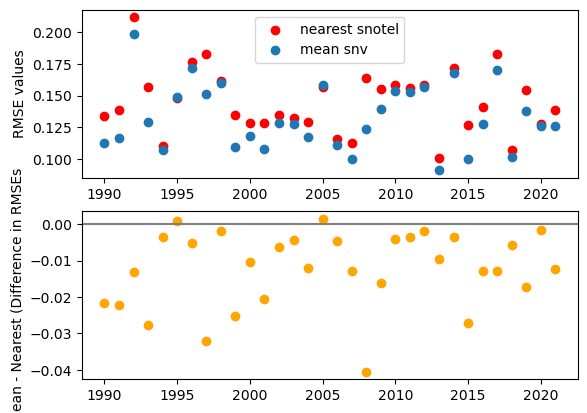

In [545]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), RMSE2s, color='red', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), RMSEs, label='mean snv')
ax1.legend(loc='best')
ax1.set_ylabel('RMSE values')

ax2.scatter(np.arange(1990, 2022), np.subtract(RMSEs, RMSE2s), color = 'orange', label='mean snv')
ax2.axhline(0, color='grey')
ax2.set_ylabel('Mean - Nearest (Difference in RMSEs')

In [500]:
print(md2)
MD2s

-0.0005262956


[-0.029213086,
 0.029248185,
 -0.06563987,
 -0.019597499,
 0.025780119,
 0.04657259,
 0.05159048,
 0.0931227,
 -0.054871254,
 0.0107915895,
 -0.008679113,
 -0.015068219,
 -0.054547798,
 0.024164774,
 -0.045556396,
 -0.022142109,
 0.01596535,
 0.0003456314,
 0.072533,
 0.07687012,
 -0.05885146,
 0.088404596,
 -0.07232723,
 -0.024119876,
 0.018540185,
 -0.05320957,
 -0.0010882004,
 -0.0370936,
 -0.015189733,
 -0.015455768,
 0.013940369,
 0.007939658]

In [501]:
print(rmse2)
RMSE2s

0.14697272


[0.1339645,
 0.13846575,
 0.2120238,
 0.15665637,
 0.1101275,
 0.14791687,
 0.17695256,
 0.18311591,
 0.16197349,
 0.13440587,
 0.12822281,
 0.12802522,
 0.13469222,
 0.13196449,
 0.12888344,
 0.15708898,
 0.115612805,
 0.112396024,
 0.16386959,
 0.15532644,
 0.15810077,
 0.15641667,
 0.15868397,
 0.10052843,
 0.17166783,
 0.1271323,
 0.1407492,
 0.18335477,
 0.10731382,
 0.15483676,
 0.12754582,
 0.13871229]

### Convert the SNOTEL and look-up data array back to WGS84:

In [ ]:
stations_1yr_4326 = stations_1yr.to_crs('epsg:4326')
nearest_station_4326 = nearest_station.rio.reproject('epsg:4326')

In [ ]:
for year in range(32):
    
    nearest_snv[year] = nearest_station_4326

### Now calculate SWE using the nearest SNOTEL regardless of cluster:

In [45]:
nearest_station_nc = xr.full_like(clusters_reanalysis_match.rio.reproject('epsg:32612'), np.nan)

In [46]:
stations_1yr_utm = stations_1yr.to_crs('epsg:32612')

In [47]:
nearest_station_nc_utm = nearest_station_nc.rio.reproject('epsg:32612')

In [553]:
np.where(~np.isnan(clusters_reanalysis_match_utm))

(array([  32,   32,   32, ..., 1817, 1817, 1817]),
 array([429, 430, 431, ..., 671, 672, 673]))

In [550]:
clusters_reanalysis_match_utm

<xarray.DataArray '__xarray_dataarray_variable__' (y: 1978, x: 1350)> Size: 21MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * x            (x) float64 11kB 3.798e+05 3.803e+05 ... 9.865e+05 9.869e+05
  * y            (y) float64 16kB 4.825e+06 4.825e+06 ... 3.936e+06 3.935e+06
    spatial_ref  int64 8B 0

In [557]:
indices

(array([0, 0, 0, ..., 1, 1, 1]),
 array([     0,      1,      2, ..., 418274, 418275, 418276]))

In [48]:
tree = cKDTree(np.c_[stations_1yr_utm.geometry.x.values,stations_1yr_utm.geometry.y.values])
indices = np.where(~np.isnan(clusters_reanalysis_match_utm))

# Extract coordinates from indices in data1
query_points = []
for i in range(len(indices[0])):
    y_index = indices[0][i]
    x_index = indices[1][i]
    x_coord = nearest_station_nc_utm.coords['x'].values[x_index]
    y_coord = nearest_station_nc_utm.coords['y'].values[y_index]
    query_points.append((x_coord, y_coord))
dist, idx = tree.query(query_points, k=1)
for i in np.arange(len(query_points)):
    nearest_station_nc_utm.loc[dict(x=query_points[i][0], y=query_points[i][1])] = stations_1yr_utm.iloc[idx[i]]['id']

<Axes: title={'center': 'spatial_ref = 0'}, xlabel='x coordinate of projection\n[metre]', ylabel='y coordinate of projection\n[metre]'>

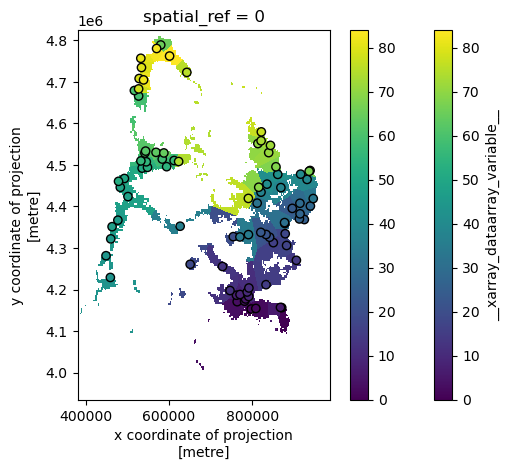

In [559]:
fig, ax = plt.subplots()
nearest_station_nc_utm.plot(ax=ax)
stations_1yr_utm.plot(ax=ax,column='id', edgecolor='k',legend=True)

In [49]:
nearest_snv_nc = xr.full_like(swe.SWE_Post, np.nan)

In [50]:
nearest_station_nc_4326 = nearest_station_nc_utm.rio.reproject_match(nearest_snv_nc)

In [51]:
site_ids = list(np.unique(nearest_station_nc_4326.data))
site_ids_nan = site_ids[0:-1]

for i in site_ids_nan:
    for year in range(0,32):
        nearest_snv_nc[year] = nearest_snv_nc[year].where((nearest_station_nc_4326 != i), stations[(stations.index.get_level_values(1)==(year + 1990)) & (stations.index.get_level_values(0) == stations_1yr[stations_1yr['id']==i].index[0])]['station_n'].values[0])

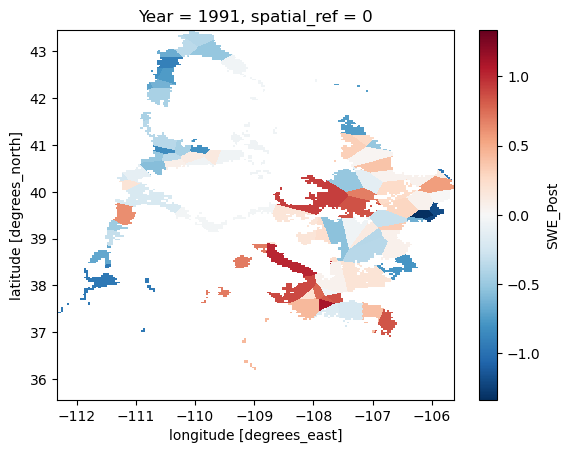

In [564]:
nearest_snv_nc[1].plot()

In [52]:
swe_calc_nearest_nc = xr.full_like(swe.SWE_Post, np.nan)

In [53]:
for year in np.arange(0,32):
    to_exclude = [year]
    years = [element for i, element in enumerate(np.arange(1990,2022)) if i not in to_exclude]
    swe_calc_nearest_nc[year] = nearest_snv_nc[year] * swe.SWE_Post.sel(Year=years).std(dim='Year', skipna=True, ddof=1).where(swe.SWE_Post.mean(dim='Year')>0.1) + swe.SWE_Post.sel(Year=years).mean(dim='Year').where(swe.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees

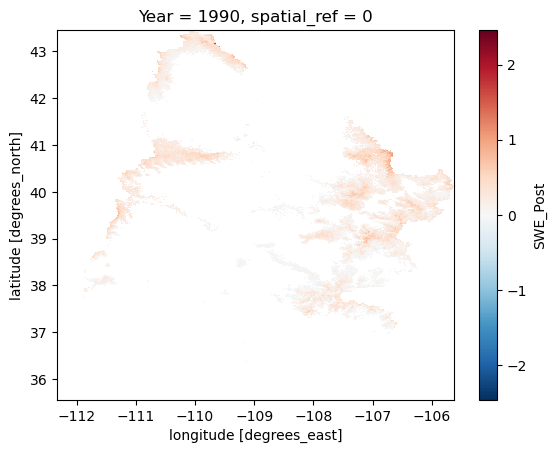

In [568]:
swe_calc_nearest_nc[0].plot()

### Compare to Reanalysis from the 'current' year:

In [54]:
dif_swe3 = swe_calc_nearest_nc - swe.SWE_Post

In [55]:
R3s = []
MD3s = []
RMSE3s = []

for year in np.arange(0,32):
    R3s.append(np.corrcoef(swe.SWE_Post[year].values[swe.SWE_Post[year].notnull() & swe_calc_nearest_nc[year].notnull()].flatten(), swe_calc_nearest_nc[year].values[swe.SWE_Post[year].notnull() & swe_calc_nearest_nc[year].notnull()].flatten())[0,1])
    MD3s.append(dif_swe3[year].values[dif_swe3[year].notnull()].mean())
    RMSE3s.append(np.sqrt(((swe_calc_nearest_nc[year].values[swe_calc_nearest_nc[year].notnull()] - swe.SWE_Post[year].values[swe_calc_nearest_nc[year].notnull()].flatten()) ** 2).mean()))

In [56]:
r3 = np.corrcoef(swe.SWE_Post.values[swe.SWE_Post.notnull() & swe_calc_nearest_nc.notnull()].flatten(), swe_calc_nearest_nc.values[swe.SWE_Post.notnull() & swe_calc_nearest_nc.notnull()].flatten())[0,1]
md3 = dif_swe3.values[dif_swe3.notnull()].mean()
rmse3 = np.sqrt(((swe_calc_nearest_nc.values[swe_calc_nearest_nc.notnull()] - swe.SWE_Post.values[swe_calc_nearest_nc.notnull()].flatten()) ** 2).mean())

In [581]:
print(r)
print(md)
print(rmse)

0.798136713283125
-0.00043269902
0.13511856


In [573]:
print(r3)
print(md3)
print(rmse3)

0.7861427543568354
-0.00057910016
0.14318849


### Calculate SNV using mean of all snotel in the basin:

In [13]:
calculated_swe_all_mean = xr.full_like(swe.SWE_Post, np.nan)

In [14]:
for year in np.arange(0,32):
    to_exclude = [year]
    years = [element for i, element in enumerate(np.arange(1990,2022)) if i not in to_exclude]
    calculated_swe_all_mean[year] = stations_ucrb[stations_ucrb.index.get_level_values(1) == (year+1990)]['station_n'].mean() * swe.SWE_Post.sel(Year=years).std(dim='Year', skipna=True, ddof=1).where(swe.SWE_Post.mean(dim='Year')>0.1) + swe.SWE_Post.sel(Year=years).mean(dim='Year').where(swe.SWE_Post.mean(dim='Year')>0.1)

/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/Hannah/micromamba/envs/analysis_2024/lib/python3.12/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees

### Compare to Reanalysis from the 'current' year:

In [15]:
dif_swe4 = calculated_swe_all_mean - swe.SWE_Post

In [17]:
R4s = []
MD4s = []
RMSE4s = []

for year in np.arange(0,32):
    R4s.append(np.corrcoef(swe.SWE_Post[year].values[swe.SWE_Post[year].notnull() & calculated_swe_all_mean[year].notnull()].flatten(), calculated_swe_all_mean[year].values[swe.SWE_Post[year].notnull() & calculated_swe_all_mean[year].notnull()].flatten())[0,1])
    MD4s.append(dif_swe4[year].values[dif_swe4[year].notnull()].mean())
    RMSE4s.append(np.sqrt(((calculated_swe_all_mean[year].values[calculated_swe_all_mean[year].notnull()] - swe.SWE_Post[year].values[calculated_swe_all_mean[year].notnull()].flatten()) ** 2).mean()))

In [18]:
r4 = np.corrcoef(swe.SWE_Post.values[swe.SWE_Post.notnull() & calculated_swe_all_mean.notnull()].flatten(), calculated_swe_all_mean.values[swe.SWE_Post.notnull() & calculated_swe_all_mean.notnull()].flatten())[0,1]
md4 = dif_swe4.values[dif_swe4.notnull()].mean()
rmse4 = np.sqrt(((calculated_swe_all_mean.values[calculated_swe_all_mean.notnull()] - swe.SWE_Post.values[calculated_swe_all_mean.notnull()].flatten()) ** 2).mean())

In [19]:
print(r4)
print(md4)
print(rmse4)

0.7854121084486403
-0.00022720596
0.13804497


Text(0, 0.5, 'Mean - Nearest (Difference in Rs)')

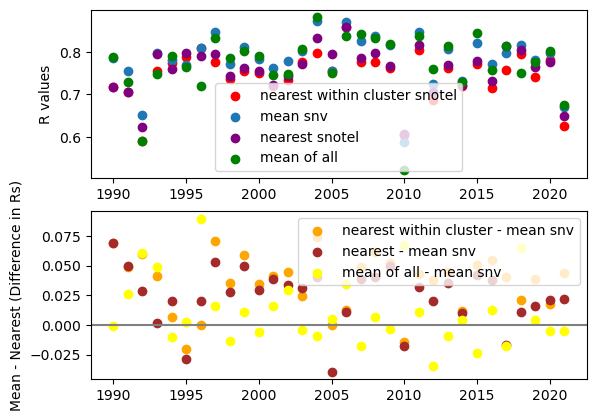

In [57]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), R2s, color='red', label='nearest within cluster snotel')
ax1.scatter(np.arange(1990, 2022), Rs, label='mean snv')
ax1.scatter(np.arange(1990, 2022), R3s, color='purple', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), R4s, color='green', label='mean of all')
ax1.legend(loc='lower center')
ax1.set_ylabel('R values')

ax2.scatter(np.arange(1990, 2022), np.subtract(Rs, R2s), color = 'orange', label='nearest within cluster - mean snv')
ax2.scatter(np.arange(1990, 2022), np.subtract(Rs, R3s), color = 'brown', label='nearest - mean snv')
ax2.scatter(np.arange(1990, 2022), np.subtract(Rs, R4s), color = 'yellow', label='mean of all - mean snv')
ax2.axhline(0, color='grey')
ax2.legend(loc='best')
ax2.set_ylabel('Mean - Nearest (Difference in Rs)')

Years with especially bad r values: 1992, 2010, 2021  

Text(0, 0.5, 'Mean - Nearest (Difference in MDs')

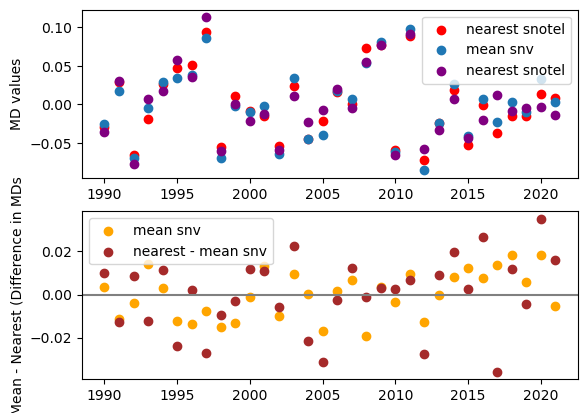

In [579]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), MD2s, color='red', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), MDs, label='mean snv')
ax1.scatter(np.arange(1990, 2022), MD3s, color='purple', label='nearest snotel')
ax1.legend(loc='best')
ax1.set_ylabel('MD values')

ax2.scatter(np.arange(1990, 2022), np.subtract(MDs, MD2s), color = 'orange', label='mean snv')
ax2.scatter(np.arange(1990, 2022), np.subtract(MDs, MD3s), color = 'brown', label='nearest - mean snv')
ax2.axhline(0, color='grey')
ax2.legend(loc='best')
ax2.set_ylabel('Mean - Nearest (Difference in MDs')

Years with bad MD: 1997, 2011, 2008, 2009? But not as bad of outliers here

Text(0, 0.5, 'Mean - Nearest (Difference in RMSEs')

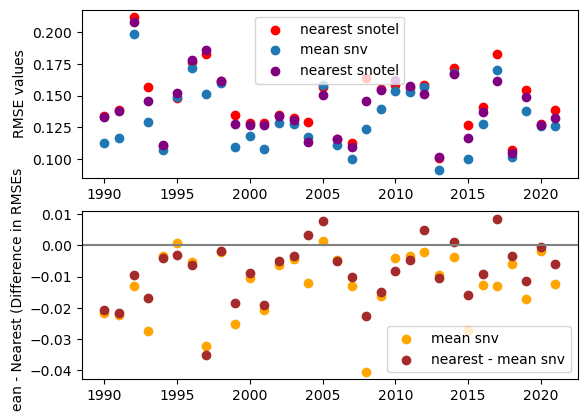

In [580]:
fig, (ax1,ax2) = plt.subplots(2,1)
ax1.scatter(np.arange(1990, 2022), RMSE2s, color='red', label='nearest snotel')
ax1.scatter(np.arange(1990, 2022), RMSEs, label='mean snv')
ax1.scatter(np.arange(1990, 2022), RMSE3s, color='purple', label='nearest snotel')
ax1.legend(loc='best')
ax1.set_ylabel('RMSE values')

ax2.scatter(np.arange(1990, 2022), np.subtract(RMSEs, RMSE2s), color = 'orange', label='mean snv')
ax2.scatter(np.arange(1990, 2022), np.subtract(RMSEs, RMSE3s), color = 'brown', label='nearest - mean snv')
ax2.axhline(0, color='grey')
ax2.legend(loc='best')
ax2.set_ylabel('Mean - Nearest (Difference in RMSEs')

Years with bad RMSE values: 1992, 1996, 1997

In [596]:
print(np.std(Rs))
print(np.std(MDs))
print(np.std(RMSEs))

0.05899240714016815
0.045260824
0.025445297


In [597]:
print(np.std(R2s))
print(np.std(MD2s))
print(np.std(RMSE2s))

0.0560970975260333
0.04469006
0.024609227


In [598]:
print(np.std(R3s))
print(np.std(MD3s))
print(np.std(RMSE3s))

0.055420575747347725
0.04457641
0.024175309


In [58]:
print(np.std(R4s))
print(np.std(MD4s))
print(np.std(RMSE4s))

0.07110704040949727
0.044875458
0.02908534


In [599]:
print(np.subtract(*np.percentile(Rs, [75, 25])))
print(np.subtract(*np.percentile(MDs, [75, 25])))
print(np.subtract(*np.percentile(RMSEs, [75, 25])))

0.04897930760576741
0.05848632799461484
0.04125974886119366


In [600]:
print(np.subtract(*np.percentile(R2s, [75, 25])))
print(np.subtract(*np.percentile(MD2s, [75, 25])))
print(np.subtract(*np.percentile(RMSE2s, [75, 25])))

0.055994233151189565
0.05575182382017374
0.03007315844297409


In [601]:
print(np.subtract(*np.percentile(R3s, [75, 25])))
print(np.subtract(*np.percentile(MD3s, [75, 25])))
print(np.subtract(*np.percentile(RMSE3s, [75, 25])))

0.06444368725569016
0.04385079862549901
0.028424788266420364


In [59]:
print(np.subtract(*np.percentile(R4s, [75, 25])))
print(np.subtract(*np.percentile(MD4s, [75, 25])))
print(np.subtract(*np.percentile(RMSE4s, [75, 25])))

0.0676351874724912
0.046331103425472975
0.03975060023367405


In [60]:
data = {
  "Rs": Rs,
    "MDs": MDs,
    "RMSEs": RMSEs,
    "version":"mean_wic"
}

#load data into a DataFrame object:
mean_df = pd.DataFrame(data)

In [61]:
data = {
    "Rs": R2s,
    "MDs": MD2s,
    "RMSEs":RMSE2s,
    "version":"nearest_wic"
}

#load data into a DataFrame object:
nearest_wic_df = pd.DataFrame(data)

In [62]:
data = {
    "Rs" : R3s, 
    "MDs": MD3s,
    "RMSEs":RMSE3s,
    "version":"nearest"
}

#load data into a DataFrame object:
nearest_df = pd.DataFrame(data)

In [63]:
data = {
    "Rs" : R4s, 
    "MDs": MD4s,
    "RMSEs":RMSE4s,
    "version":"all_mean"
}

#load data into a DataFrame object:
all_mean_df = pd.DataFrame(data)

In [64]:
metrics = pd.concat([mean_df, nearest_wic_df, nearest_df, all_mean_df], ignore_index=True)

In [65]:
import altair as alt

In [66]:
r_chart = alt.Chart(metrics).mark_boxplot().encode(
    alt.X("Rs:Q").scale(zero=False),
    alt.Y("version:N")
)

md_chart = alt.Chart(metrics).mark_boxplot().encode(
    alt.X("MDs:Q").scale(zero=False),
    alt.Y("version:N")
)

rmse_chart = alt.Chart(metrics).mark_boxplot().encode(
    alt.X("RMSEs:Q").scale(zero=False),
    alt.Y("version:N")
)

concat = alt.vconcat(r_chart, md_chart, rmse_chart)
concat

alt.VConcatChart(...)

In [70]:
wstates = gpd.read_file('../data/misc/western_states.shp')
wstates_4326=wstates.to_crs('epsg:4326')

<Axes: >

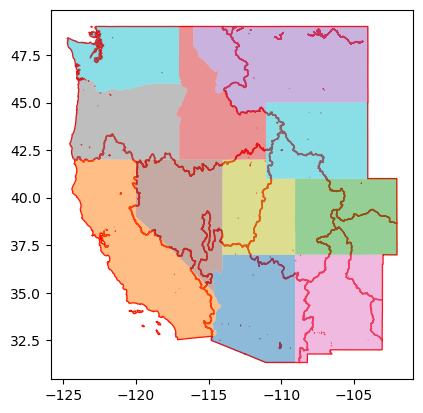

In [76]:
fig, ax = plt.subplots()
huc2.plot(ax=ax, facecolor='none', edgecolor='red')
wstates_4326.plot(ax=ax, column='NAME',edgecolor='none', alpha=0.5)

In [78]:
stations_ucrb.columns

Index(['station_n', 'reanalysis_n', 'elevation_m', 'station_swe',
       'station_swe_mean', 'reanalysis_swe', 'deg_days_0C', 'cold_deg_days',
       'cumulative_precip_m', 'precip_mean', 'precip_std', 'precip_n',
       'log_cumulative_precip_m', 'log_reanalysis_swe', 'log_station_swe',
       'log_precip_mean', 'log_station_swe_mean', 'log_reanalysis_swe_mean',
       'log_precip_std', 'log_station_swe_std', 'log_reanalysis_swe_std',
       'log_precip_n', 'log_station_n', 'log_reanalysis_n', 'latitude',
       'longitude', 'geometry', 'cluster'],
      dtype='object')

In [80]:
station_clusters = pickle.load(open('../data/combined_snotel_cdec/station_clusters.pkl', 'rb'))

In [81]:
station_clusters

,name,network,elevation_m,geometry,cluster_anom
code,,,,,
301_CA_SNTL,Adin Mtn,SNOTEL,1886.712036,POINT Z (-120.79192 41.23583 1886.71204),3
302_OR_SNTL,Aneroid Lake #2,SNOTEL,2255.520020,POINT Z (-117.19258 45.21328 2255.52002),0
303_CO_SNTL,Apishapa,SNOTEL,3048.000000,POINT Z (-105.06749 37.33062 3048.00000),2
304_OR_SNTL,Arbuckle Mtn,SNOTEL,1758.696045,POINT Z (-119.25392 45.19085 1758.69604),0
306_ID_SNTL,Atlanta Summit,SNOTEL,2310.384033,POINT Z (-115.23907 43.75690 2310.38403),3
...,...,...,...,...,...
CRL,CHARLOTTE LAKE,CDEC,3169.920000,POINT Z (-118.42601 36.77752 10400.00000),2
CSV,CASA VIEJA MEADOWS,CDEC,2529.840000,POINT Z (-118.26769 36.19810 8300.00000),3
CAP,CAPLES LAKE,CDEC,2438.400000,POINT Z (-120.04158 38.71079 8000.00000),3
